# Team Project: Investigating Carbon Emissions in British Columbia

### Team Members:
- **Mike Zhao**
- **Winston Wang**
- **Tuan Hoang**

This project focuses on analyzing total Carbon Emissions (CO2E) in the province of British Columbia, exploring contributing factors, relationships between emissions and economic growth, and predicting future emissions through data-driven models.

## Introduction

The increasing concerns about climate change and sustainability have led to a growing interest in understanding the factors driving carbon emissions. This project investigates total Carbon Emissions (CO2E) in British Columbia (BC), with a focus on identifying the major contributing sectors, analyzing the relationship between key sectors' emissions and their economic growth (GDP), and building predictive models for total emissions.

### Objectives:
1. Identify the key sectors contributing to BC's total carbon emissions.
2. Analyze the relationship between sectoral carbon emissions and their GDP growth over time.
3. Build predictive models using Machine Learning techniques, specifically LASSO regression, to estimate total emissions in BC.

The project was inspired by the team's shared passion for **Sustainability** and **ESG (Environmental, Social, Governance)** and their interest in leveraging **data visualization** for actionable insights. 


## Methodology

### Data Sources:
- **GHG Emissions Data:** Provincial GHG data from BC, segmented by sector.
- **Economic Data:** GDP contributions by sector from BC's official economic statistics.

### Analytical Techniques:
1. **Data Exploration:**
   - Identify sectors contributing the most emissions over time.
   - Visualize temporal trends in emissions and economic growth using interactive dashboards.

2. **Statistical Analysis:**
   - Investigate the relationship between key sectors' carbon emissions and their GDP.
   - Apply lin-log and log-log regression models for analysis.

3. **Predictive Modeling:**
   - Use Machine Learning techniques, including **LASSO regression**, to build a multi-linear predictive model for total emissions based on selected sectors.

The analysis draws upon the quantitative techniques learned in **ECON 323: Quantitative Economic Modelling with Data Science Applications**.

---


### Following are the main code section for our group project:

Importing all the libraries needed for the analysis:

In [ ]:
import pandas as pd



#### Importing and Cleaning the Data:

##### **Data Cleaning Process for BC GHG Emission Dataset**
We imported the BC GHG emissions dataset, removed blank rows and columns, and renamed key columns for clarity. The data was then split into two parts:
1. The main GHG emission dataset.
2. A subset dataset containing percentage trends.

---

##### **Data Cleaning Process for BC GDP Dataset**

The BC GDP dataset was imported with unnecessary rows and columns removed. We renamed key columns, set the "Years" column as the index, and converted numeric values to the appropriate format to facilitate analysis.


Year  TOTAL1  ENERGY  STATIONARY COMBUSTION  \
1990    54.7    42.6                   19.3   
1991    53.3    41.5                   18.1   
1992    52.2    40.3                   16.9   
1993    54.9    43.1                   19.1   
1994    57.3    45.4                   19.2   

Year  Public Electricity and Heat Production   Petroleum Refining Industries  \
1990                                      0.8                            1.2   
1991                                      0.5                            1.2   
1992                                      0.9                            1.0   
1993                                      2.0                            0.7   
1994                                      1.8                            0.7   

Year  Oil and Gas Extraction  Mining  Manufacturing Industries  Construction  \
1990                     2.1     0.6                       6.5           0.3   
1991                     1.4     0.6                       6.2           0.3

Year
TOTAL1                                      float64
ENERGY                                      float64
STATIONARY COMBUSTION                       float64
Public Electricity and Heat Production      float64
Petroleum Refining Industries               float64
                                             ...   
Decomposition of Harvested Wood Products    float64
Cropland Management                         float64
Wetland Management                          float64
Grassland Management                        float64
Settlement Management                       float64
Length: 85, dtype: object

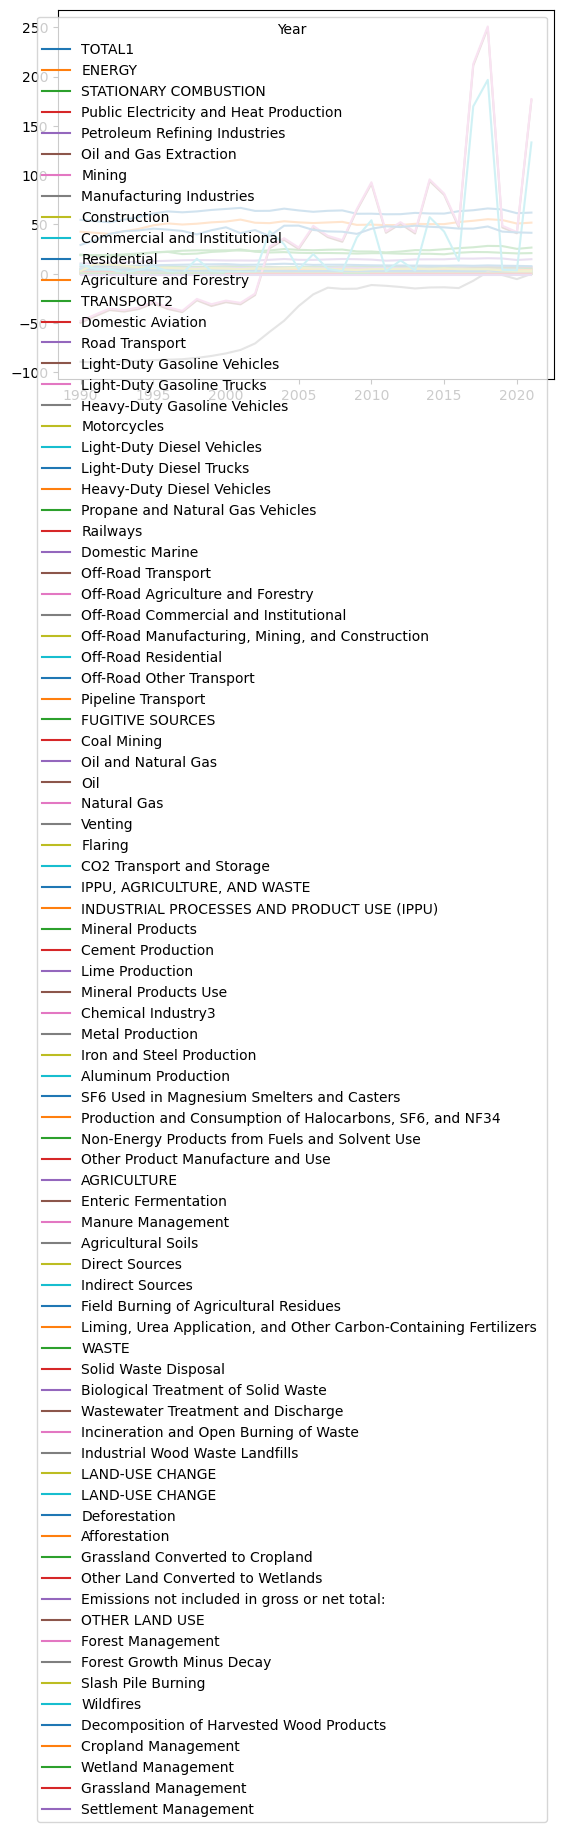

In [ ]:
ghg = "BC_GHG_1990-2021.csv" 
ghgdata = pd.read_csv(ghg, skiprows=2)

ghgdata = ghgdata.dropna(how='all', axis=1) 
ghgdata = ghgdata.dropna(how='all', axis=0) 

ghgdata = ghgdata.iloc[:85]  # Retain rows 0 to 84 (inclusive)

rename_mapping = {
    "Unit: MtCO2e": "Year",
    "Unnamed: 36": "2007->2021 pct",
    "Unnamed: 38": "2020->2021 pct",
    "Unnamed: 40": "3-Year Trend pct"
}
ghgdata = ghgdata.rename(columns=rename_mapping)

ghgdata = ghgdata.set_index("Year").T

ghg_trend = ghgdata.tail(6)
ghgdata = ghgdata.iloc[:-6]

ghgdata = ghgdata.apply(pd.to_numeric, errors='coerce')

print(ghgdata.head())

ghgdata.plot()
ghgdata.dtypes



In [37]:
print(ghg_trend)

Year             TOTAL1 ENERGY STATIONARY COMBUSTION  \
2007→2021          -1.8   -0.2                  -0.1   
2007->2021 pct      -3%    -0%                   -0%   
2020→2021          +0.6    0.9                  +0.3   
2020->2021 pct      +1%    +2%                   +1%   
3-Year Trend       -4.2   -3.4                  -1.0   
3-Year Trend pct    -6%    -6%                   -5%   

Year             Public Electricity and Heat Production   \
2007→2021                                           -0.4   
2007->2021 pct                                      -31%   
2020→2021                                           +0.2   
2020->2021 pct                                      +31%   
3-Year Trend                                        -0.1   
3-Year Trend pct                                     -7%   

Year             Petroleum Refining Industries Oil and Gas Extraction Mining  \
2007→2021                                 -0.2                   +0.6   -0.0   
2007->2021 pct            

This code below has some issue. Refer to the code of one more cell down. 

In [39]:
import pandas as pd

# Load the dataset and convert numeric columns during import
gdpdata = pd.read_csv(
    "BC_GDP_1997-2023.csv",
    skiprows=3,  # Skip the first three rows
    thousands=',',  # Handle commas in numeric columns
    dtype={"Unnamed: 0": str}  # Ensure "Years" remains a string
)

# Rename the "Unnamed: 0" column to "Years"
gdpdata = gdpdata.rename(columns={"Unnamed: 0": "Years"})

# Set "Years" as the index
gdpdata = gdpdata.set_index("Years")

# Transpose the DataFrame
gdpdata = gdpdata.T

# Display the updated dataset
print(gdpdata.head())


Years  NaN All industries Goods-producing industries  \
1997   NaN        154,315                     39,203   
1998   NaN        155,817                     38,082   
1999   NaN        160,987                     40,201   
2000   NaN        168,580                     44,068   
2001   NaN        169,520                     42,538   

Years Agriculture, forestry, fishing and hunting Crop and animal production  \
1997                                       5,369                      1,540   
1998                                       5,409                      1,601   
1999                                       5,287                      1,713   
2000                                       5,155                      1,668   
2001                                       5,373                      1,968   

Years Forestry and logging Fishing, hunting and trapping  \
1997                 2,896                           413   
1998                 2,939                           276   
1999    

Here is possibly the correct code for the clean data of GDP for our data sets. 

Years All industries Goods-producing industries  \
1997        154315.0                    39203.0   
1998        155817.0                    38082.0   
1999        160987.0                    40201.0   
2000        168580.0                    44068.0   
2001        169520.0                    42538.0   

Years Agriculture, forestry, fishing and hunting Crop and animal production  \
1997                                      5369.0                     1540.0   
1998                                      5409.0                     1601.0   
1999                                      5287.0                     1713.0   
2000                                      5155.0                     1668.0   
2001                                      5373.0                     1968.0   

Years Forestry and logging Fishing, hunting and trapping  \
1997                2896.0                         413.0   
1998                2939.0                         276.0   
1999                2764.0            

Years
All industries                                             object
Goods-producing industries                                 object
Agriculture, forestry, fishing and hunting                 object
Crop and animal production                                 object
Forestry and logging                                       object
                                                            ...  
Information and communication technology, manufacturing    object
Information and communication technology, services         object
Energy sector                                              object
All industries (except cannabis sector)                    object
Cannabis sector                                            object
Length: 82, dtype: object

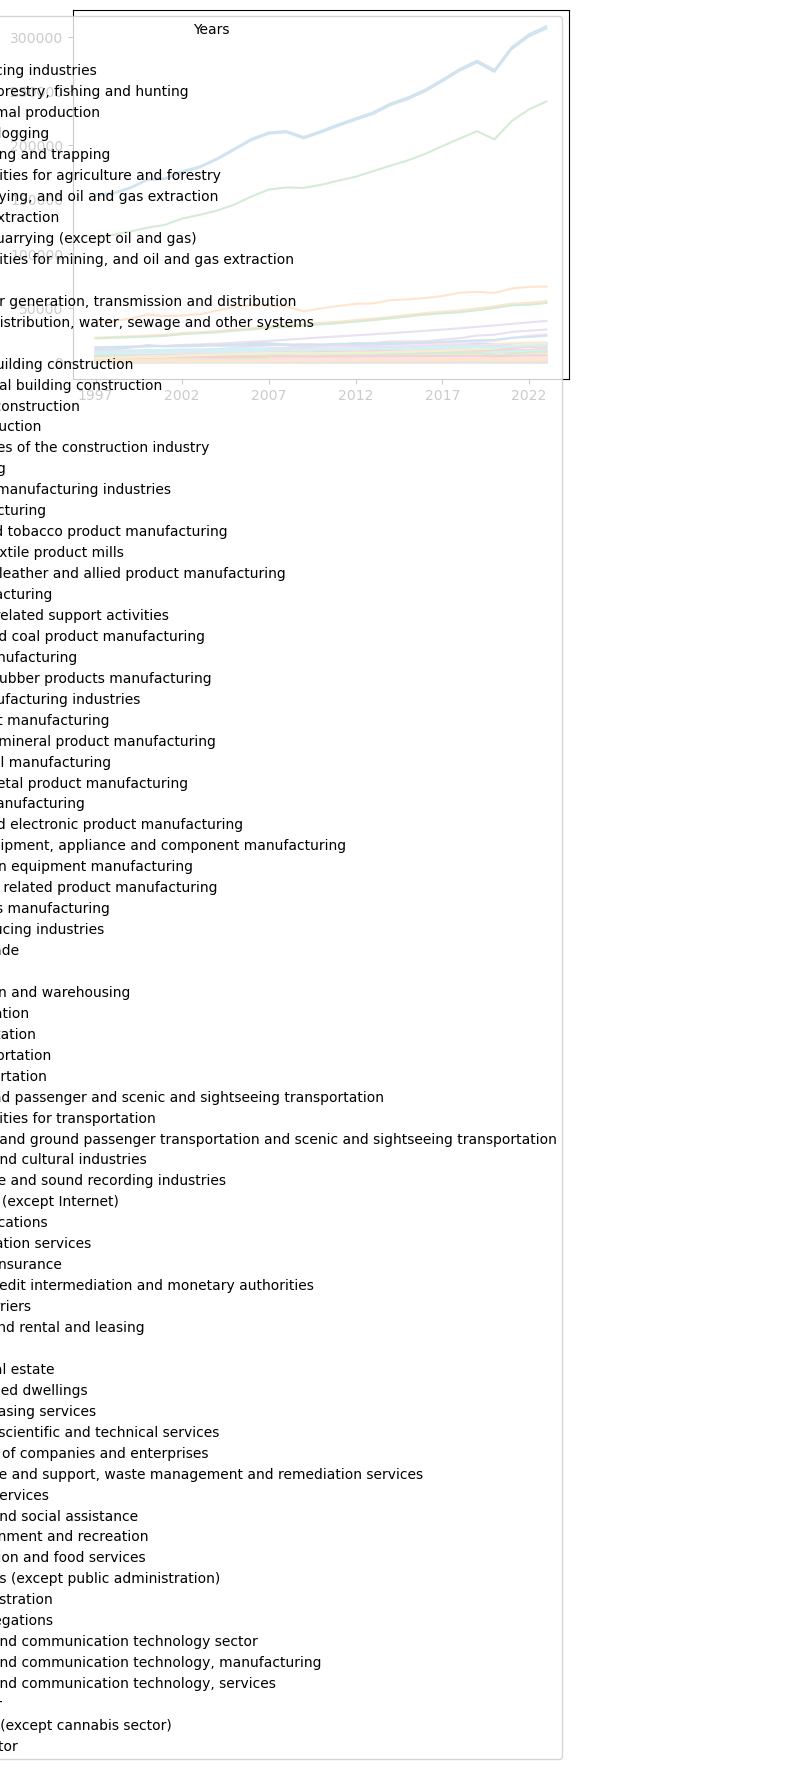

In [40]:
gdp = "BC_GDP_1997-2023.csv" 
gdpdata = pd.read_csv(gdp, skiprows=3)

gdpdata = gdpdata.dropna(how='all', axis=1) 
gdpdata = gdpdata.dropna(how='all', axis=0) 

gdpdata = gdpdata.iloc[:82]  # Retain rows 0 to 84 (inclusive)

gdpdata = gdpdata.rename(columns={"Unnamed: 0": "Years"})

for col in gdpdata.columns[1:]:
    gdpdata[col] = gdpdata[col].str.replace(',', '')

gdpdata.iloc[:, 1:] = gdpdata.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

gdpdata = gdpdata.set_index("Years")

gdpdata = gdpdata.T

print(gdpdata.head())

gdpdata.plot()
gdpdata.dtypes


In [18]:
print(gdpdata.tail())

                                           Unnamed: 0     1997     1998  \
80  Information and communication technology, manu...      162      199   
81  Information and communication technology, serv...    3,842    4,195   
82                                      Energy sector    9,441    9,112   
83            All industries (except cannabis sector)  153,770  155,182   
84                                    Cannabis sector      664      728   

       1999     2000     2001     2002     2003     2004     2005  ...  \
80      325      590      434      298      319      394      417  ...   
81    4,565    5,098    5,235    5,979    6,746    7,026    7,485  ...   
82    9,583   11,265   11,014   10,961   10,918   11,178   12,644  ...   
83  160,326  167,911  168,674  175,074  179,363  186,714  195,663  ...   
84      756      775      899      948    1,026    1,058    1,111  ...   

       2014     2015     2016     2017     2018     2019     2020     2021  \
80      333      300      

### **Step 1: Visualizing Emissions Across Main Sectors**

#### Objective:
Plot the emissions of the 8 main sectors (marked green in the GHG dataset) along with the total emissions in BC to identify the subsectors contributing the most to GHG emissions. If the number of lines makes the graph cluttered, create two subplots for better clarity.

#### Actions:
- Generate a line plot for the 8 main sectors and the total emissions.
- Compare the top 3 contributing sectors.
- Provide an interpretation of why these sectors contribute the most to BC’s emissions based on available data and potential underlying reasons.


### **Step 2: Comparing GHG Emissions with GDP Growth**

#### Objective:
Analyze the top 6 emitting sectors and their corresponding sectors in the GDP dataset to understand their growth patterns. Investigate:
- Whether emissions and GDP growth align over time.
- Any lags or anomalies between emissions and GDP growth.
- Specific patterns in any sector worth further exploration.

#### Actions:
- Plot emissions and GDP growth for the top 6 sectors side by side.
- Identify correlations, lags, or deviations.
- Highlight interesting findings for sectors like AI or Electric Vehicles, even if not included in the GHG dataset.


### **Step 3: Exploring Key Sector Patterns**

#### Objective:
From the initial comparisons, identify 4 sectors with the most intriguing patterns for in-depth analysis.

#### Actions:
- Create detailed visualizations for each of the 4 selected sectors.
- Use subplots to compare their GHG emissions and GDP trends effectively.
- Interpret sector-specific growth patterns and any shared trends across all analyzed relationships.


### **Step 4: Building a Predictive Model for Total GHG Emissions**

#### Objective:
Use the GDP data of selected sectors to predict BC’s total GHG emissions using a multi-linear regression model.

#### Actions:
- Justify the selection of independent variables based on their relevance to emissions.
- Apply the LASSO method to identify the most impactful variables.
- Build and fine-tune a regression model to achieve the highest prediction accuracy.


### **Summary of Coding Goals**

The project will culminate in:
1. Visual insights into BC’s top-emitting sectors.
2. Analysis of the relationship between emissions and GDP growth.
3. Detailed investigation of 4 key sectors and their patterns.
4. A machine learning-based predictive model to estimate BC’s total GHG emissions.


## Results

### Key Findings:
1. The top sectors contributing to BC's emissions include:
   - [Insert specific sectors and their contribution percentages.]
2. There is a significant [positive/negative] relationship between [specific sectors] emissions and their GDP growth.

### Predictive Model:
- The LASSO regression model demonstrates that [list significant predictors] are key determinants of BC's total emissions.
- The model achieves an accuracy of [insert model performance metrics].

### Data Visualizations:
- [Insert key visualizations or dashboards summarizing the results.]


## Discussion

### Policy Implications:
1. The findings suggest that policies targeting [specific sectors] can significantly reduce emissions.
2. Encouraging sustainable growth in sectors with high emissions intensity could balance economic development with environmental goals.

### Limitations:
1. The analysis is constrained by the availability of data from [years].
2. The predictive model assumes linear relationships, which may not fully capture the complexity of emissions dynamics.

### Future Research:
1. Incorporate more advanced Machine Learning techniques to improve predictive accuracy.
2. Explore additional factors influencing emissions, such as technological innovations and policy interventions.


## Conclusion

This project highlights the critical role of specific sectors in contributing to BC's carbon emissions and demonstrates the potential of data-driven models to predict emissions and guide policy decisions. By combining data visualization, statistical modeling, and Machine Learning, the team provides actionable insights to address environmental challenges and promote sustainable growth.

Under the guidance of **Dr. Philip Solimine** and **TA Derek Caughy**, this project bridges academic learning with real-world applications, emphasizing the importance of sustainability in economic modeling.


## Acknowledgments

We would like to thank **Dr. Philip Solimine** and **TA Derek Caughy** for their invaluable guidance and support throughout this project. Their insights and feedback were instrumental in shaping our analysis and results.
